### Programming and Critical Analysis

##### 1)

In [95]:
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# 1. load and partition data
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].astype('int')
df_class = df['class']
df = df.drop(['class'], axis=1)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 2. normalize data	
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 3. k-means clustering
for i in range(0, 3):
    kmeans = KMeans(n_clusters=3, random_state=i).fit(df_norm)
    labels = kmeans.labels_
    silhouette = silhouette_score(df_norm, labels)
    print(f'Silhouette score for k=3 and seed={i}: {silhouette}')
    purity = purity_score(df_class, labels)
    print(f'Purity score for k=3 and seed={i}: {purity}')

Silhouette score for k=3 and seed=0: 0.11362027575179431
Purity score for k=3 and seed=0: 0.7671957671957672
Silhouette score for k=3 and seed=1: 0.11403554201377074
Purity score for k=3 and seed=1: 0.7632275132275133
Silhouette score for k=3 and seed=2: 0.11362027575179431
Purity score for k=3 and seed=2: 0.7671957671957672


##### 2)

It's because cllusters are assigned randomly at the beggining, so the points are assigned to random clusters in the beggining and thereafter the updates should also be different, thus getting different results.

##### 3)

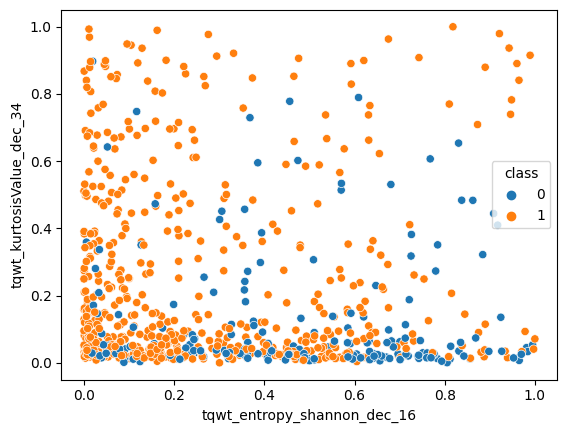

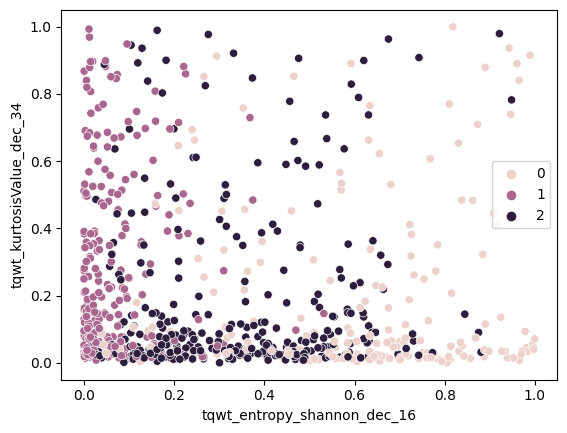

In [96]:
# # Using a scatter plot, visualize side-by-side the labeled data using as labels: i) the original
# # Parkinson diagnoses, and ii) the previously learned 𝑘 = 3 clusters (random= 0). To this end, select
# # the two most informative features as axes and color observations according to their label. For feature
# # selection, select the two input variables with highest variance on the MinMax normalized data.

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Select the two most informative features as the two input variables with highest variance on the MinMax normalized data
X = df_norm
# select the two input variables with highest variance
X_new = X.loc[:, X.var().nlargest(2).index]

# Using a scatter plot, visualize side-by-side the labeled data using as labels: i) the original
# Parkinson diagnoses, and ii) the previously learned 𝑘 = 3 clusters (random= 0).
# To this end, select the two most informative features as axes and color observations according to their label.

# 1. original Parkinson diagnoses
sns.scatterplot(x=X_new.iloc[:, 0], y=X_new.iloc[:, 1], hue = df_class)
plt.show()

# 2. previously learned k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
sns.scatterplot(x=X_new.iloc[:, 0], y=X_new.iloc[:, 1], hue=labels)
plt.show()

##### 4)

In [109]:
from cmath import exp
from sklearn.decomposition import PCA
import math

# learn the transformation (components as linear combination of features)

# !TODO what the fuck should be the number of components? is this even code?! I am having a mental breakdown here
pca = PCA(n_components = 752, svd_solver='full')
pca.fit(df_norm)

# The fraction of variance explained by a principal component is the ratio between the
# variance of that component (i.e., its eigenvalue) and total variance (i.e., sum of all eigenvalues).
# How many principal components are necessary to explain more than 80% of variability?

# 1. compute the cumulative sum of explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
# 2. find the number of components that explain more than 80% of variability
n_components = np.argmax(cumsum >= 0.8) + 1

print(f'The number of components that explain more than 80% of variability: {n_components}')

The number of components that explain more than 80% of variability: 31
